In [77]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/rohan/Documents/betflare/BetHistory20170127_Bet_SortOnDate_Descending.csv')
print(data)

     bet_status     date_placed             type  \
0          Lose  25/01/17 15:16           Soccer   
1    Cashed Out  25/01/17 15:16           Soccer   
2          Lose  25/01/17 15:16           Soccer   
3          Lose  20/01/17 17:54           Soccer   
4           Win  20/01/17 17:54           Soccer   
5           Win  20/01/17 17:54           Soccer   
6           Win  20/01/17 17:54           Soccer   
7           Win  20/01/17 17:54           Soccer   
8           Win  20/01/17 17:54           Soccer   
9           Win  20/01/17 17:54           Soccer   
10          Win  20/01/17 17:54           Soccer   
11         Lose  20/01/17 17:54           Soccer   
12          Win  20/01/17 17:54           Soccer   
13         Lose  20/01/17 17:54           Soccer   
14          Win  20/01/17 17:54           Soccer   
15         Lose  19/01/17 17:33           Soccer   
16          Win  19/01/17 17:33           Soccer   
17          Win  19/01/17 17:33           Soccer   
18          

In [78]:
data = data.fillna('')

#remove other sports
data = data[['bet_status', 'date_placed', 'type', 'bet_details', 'odds', 'stake', 'return', 'bet_type']]

soccer_data = data
sport = (soccer_data['type']) == 'Soccer'
soccer_data = soccer_data[sport]

soccer_data['date_placed'] = pd.to_datetime(soccer_data['date_placed'])
soccer_data = soccer_data.sort_values(by='date_placed', ascending=1)
soccer_data = soccer_data.reset_index(drop=True)
soccer_data.loc[:,'net_return'] = soccer_data['return'] - soccer_data['stake']

soccer_data.head()
# sample rows data.sample(n=5)

/Users/rohan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type,net_return
0,Lose,2015-01-10 18:06:00,Soccer,Multibet (Doubles),6.56,5.0,0.0,Multibet,-5.0
1,Lose,2015-01-10 18:10:00,Soccer,Multibet (Doubles),10.2,3.0,0.0,Multibet,-3.0
2,Lose,2015-01-10 18:12:00,Soccer,Multibet (Doubles),13.5,3.0,0.0,Multibet,-3.0
3,Lose,2015-01-15 16:59:00,Soccer,Multibet (5 folds),138.91,5.0,0.0,Multibet,-5.0
4,Lose,2015-01-15 19:42:00,Soccer,Multibet (Trebles),4.49,2.0,0.0,Multibet,-2.0


In [79]:
soccer_data.dtypes

bet_status             object
date_placed    datetime64[ns]
type                   object
bet_details            object
odds                   object
stake                 float64
return                float64
bet_type               object
net_return            float64
dtype: object

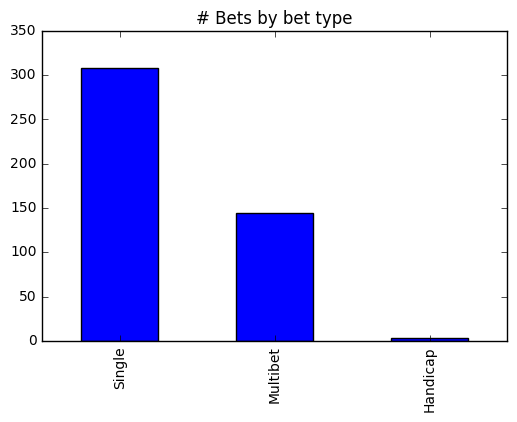

In [80]:
soccer_data['bet_type'].value_counts().plot(kind='bar',title = '# Bets by bet type')

In [81]:
# win rate

lose = soccer_data['bet_status'].value_counts()[0]
win = soccer_data['bet_status'].value_counts()[1]
cashed_out = soccer_data['bet_status'].value_counts()[2]
total_bet_count = lose + win + cashed_out
float(win) / total_bet_count

0.2967032967032967

In [82]:
# soccer_data.sort_values(by='STAKE', ascending=False)[:5]

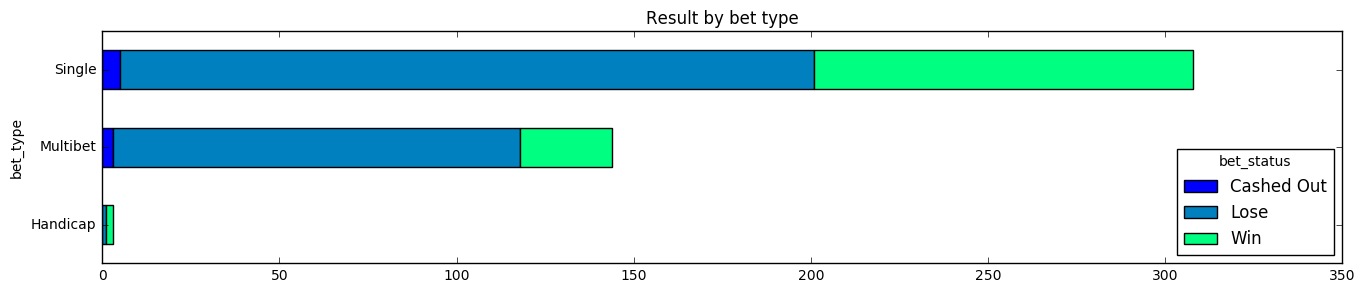

In [83]:
result_by_type = soccer_data.groupby(['bet_type', 'bet_status'])
result_by_type = result_by_type.size().unstack()
result_by_type.plot(kind='barh', stacked=True, figsize=[16,3], colormap = 'winter', title = 'Result by bet type')

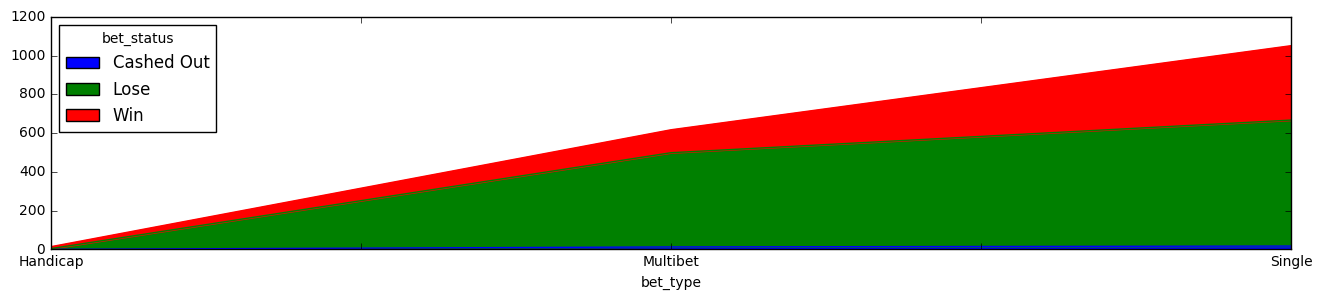

In [84]:
return_by_bet_type = soccer_data.pivot_table(index='bet_type', columns='bet_status', values='stake', aggfunc='sum')
return_by_bet_type.plot(kind='area', stacked=True, figsize=[16,3])
#return_by_bet_type.head()

In [85]:
result_by_type = result_by_type.reset_index()
result_by_type['win_rate'] = result_by_type['Win'] / (result_by_type['Win'] + result_by_type['Lose'])
result_by_type

bet_status,bet_type,Cashed Out,Lose,Win,win_rate
0,Handicap,NaN,1.0,2.0,0.666667
1,Multibet,3.0,115.0,26.0,0.184397
2,Single,5.0,196.0,107.0,0.353135


In [86]:
#stacked bar of wins and losses by month

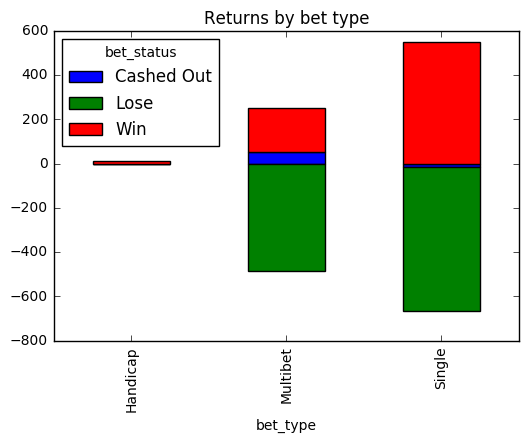

In [87]:
net_return_by_bet_type = soccer_data.pivot_table(index='bet_type', columns= 'bet_status', values='net_return', aggfunc='sum')
net_return_by_bet_type.head()
net_return_by_bet_type.plot(kind='bar', stacked=True, title='Returns by bet type')

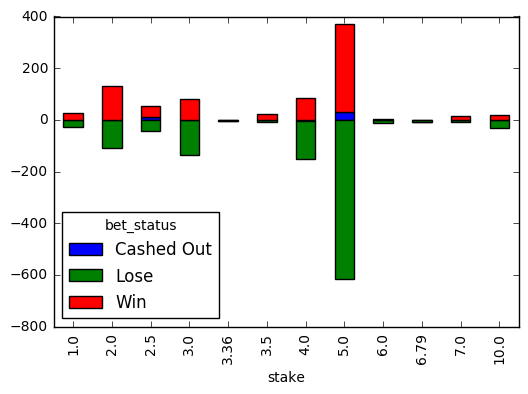

In [88]:
net_returns_by_stake = soccer_data.pivot_table(index='stake',columns='bet_status', values='net_return', aggfunc='sum')
net_returns_by_stake.head()
net_returns_by_stake.plot(kind='bar', stacked=True)

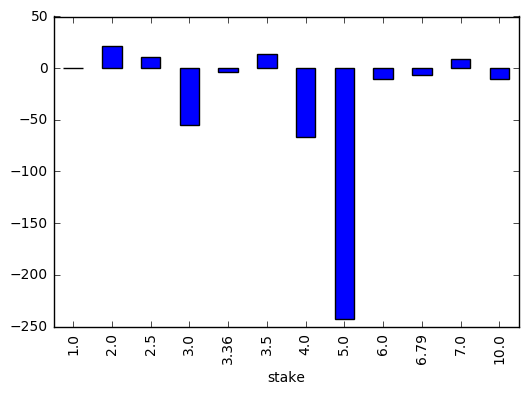

In [89]:
net_return_by_stake = soccer_data.pivot_table(index='stake', values='net_return', aggfunc='sum')
net_return_by_stake.plot(kind='bar')

In [90]:
soccer_data['net_return'].describe()

count    455.000000
mean      -0.746879
std        5.510309
min      -10.000000
25%       -5.000000
50%       -2.500000
75%        1.995000
max       34.020000
Name: net_return, dtype: float64

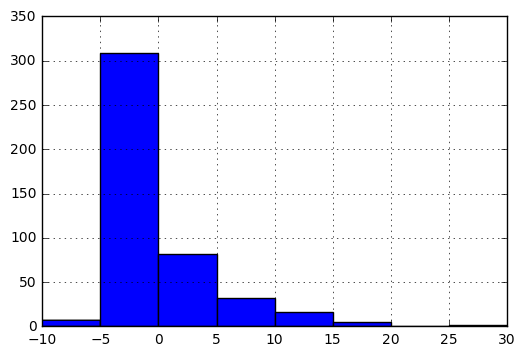

In [91]:
bin_values = np.arange(start=-10, stop=35, step=5)
soccer_data['net_return'].hist(bins=bin_values)

In [92]:
dfb = soccer_data
dfb['cum_return'] = dfb.net_return.cumsum()

dfb.head()

,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type,net_return,cum_return
0,Lose,2015-01-10 18:06:00,Soccer,Multibet (Doubles),6.56,5.0,0.0,Multibet,-5.0,-5.0
1,Lose,2015-01-10 18:10:00,Soccer,Multibet (Doubles),10.2,3.0,0.0,Multibet,-3.0,-8.0
2,Lose,2015-01-10 18:12:00,Soccer,Multibet (Doubles),13.5,3.0,0.0,Multibet,-3.0,-11.0
3,Lose,2015-01-15 16:59:00,Soccer,Multibet (5 folds),138.91,5.0,0.0,Multibet,-5.0,-16.0
4,Lose,2015-01-15 19:42:00,Soccer,Multibet (Trebles),4.49,2.0,0.0,Multibet,-2.0,-18.0


In [93]:
dfc = dfb['cum_return'].reset_index().rename(columns={'index':'bet_number'})
dfc.loc[:,'bet_number'] = dfc['bet_number'] +1


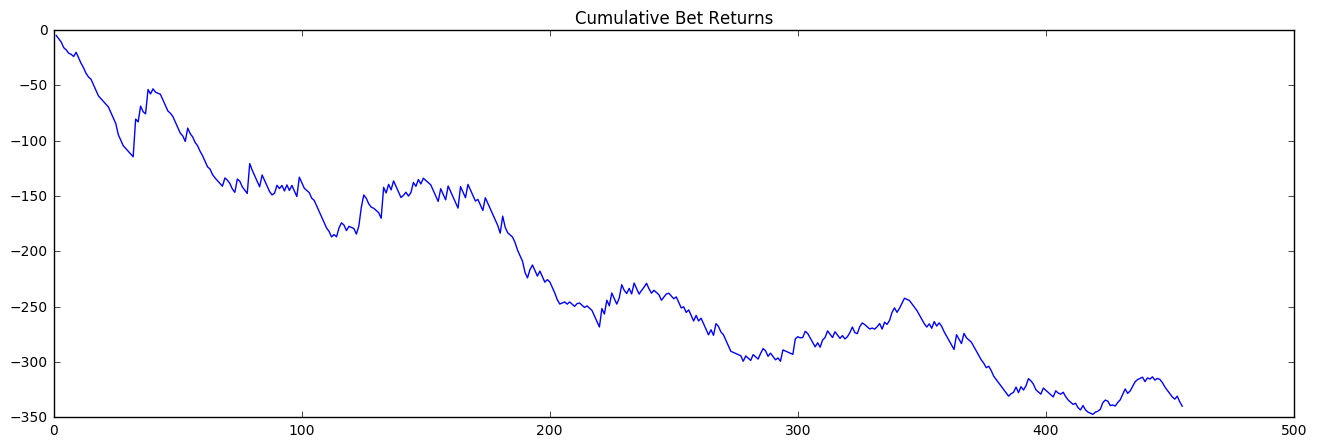

In [94]:
plt.figure(figsize=(16,5))
plt.plot(dfc['bet_number'],dfc['cum_return'])
plt.title('Cumulative Bet Returns')
plt.show()

In [95]:
dfb[100:110]

,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type,net_return,cum_return
100,Lose,2016-01-15 17:20:00,Soccer,Napoli v Sassuolo / Draw No Bet / Sassuolo @ 8.00,8,5.0,0.00,Single,-5.00,-142.97
101,Lose,2016-01-15 17:21:00,Soccer,Tottenham v Sunderland / First Goalscorer / J ...,13,2.0,0.00,Single,-2.00,-144.97
102,Lose,2016-01-15 17:24:00,Soccer,Liverpool v Man Utd / First Goalscorer / R Fir...,7.5,2.0,0.00,Single,-2.00,-146.97
103,Lose,2016-01-22 16:25:00,Soccer,Multibet (Doubles),7.92,5.0,0.00,Multibet,-5.00,-151.97
104,Lose,2016-01-22 16:25:00,Soccer,Multibet (6 folds),352.12,2.0,0.00,Multibet,-2.00,-153.97
105,Lose,2016-01-22 16:26:00,Soccer,Multibet (Doubles),11.4,5.0,0.00,Multibet,-5.00,-158.97
106,Lose,2016-01-22 16:28:00,Soccer,Multibet (Trebles),2.72,5.0,0.00,Multibet,-5.00,-163.97
107,Lose,2016-01-22 16:34:00,Soccer,Multibet (Trebles),2.56,5.0,0.00,Multibet,-5.00,-168.97
108,Cashed Out,2016-02-03 17:04:00,Soccer,Liverpool v Man City / Win-Draw-Win / Man City...,2.75,5.0,0.02,Single,-4.98,-173.95
109,Lose,2016-02-03 17:04:00,Soccer,Multibet (Trebles),4.37,5.0,0.00,Multibet,-5.00,-178.95


In [96]:
# Do we suck at betting on Chelsea?
chelsea_paradox = dfb

    #Matches involving Chelsea
chelsea_paradox['chelsea_match'] = chelsea_paradox['bet_details'].str.contains('Chelsea', case=True)
#leicester_match = leicester['bet_details'].str.contains('leicester', case=True)
chelsea_match = (chelsea_paradox['chelsea_match']) == True
chelsea_paradox = chelsea_paradox[chelsea_match]

chelsea_paradox["stake"].sum(), chelsea_paradox["return"].sum(), chelsea_paradox["net_return"].sum()

(53.5, 51.88, -1.62)

In [97]:
# Do we suck at betting on Leicester?
leicester = dfb

    #Matches involving Leicester
leicester['leicester_match'] = leicester['bet_details'].str.contains('Leicester', case=True)
    #Matches where we bet on a result
leicester['result_bet'] = leicester['bet_details'].str.contains('Win-Draw-Win', case=True)
leicester_match = (leicester['leicester_match']) == True
leicester_result_bet = (leicester['result_bet']) == True
leicester = leicester[leicester_match]
leicester = leicester[leicester_result_bet]


leicester["stake"].sum(), leicester["return"].sum(), leicester["net_return"].sum()

/Users/rohan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(50.0, 38.730000000000004, -11.27)